In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statistics
import random
import math
import warnings
import statsmodels.formula.api as sm
from scipy import stats
from scipy.stats import norm
from scipy.optimize import minimize

## Questão 1. ( $5.0$ pontos)
Considere o modelo latente a seguir:
$$
\begin{aligned}
&y_{1 i}^*=\gamma y_{2 i}+\beta_1 x_{1 i}+\beta_2 x_{2 i}+u_i \\
&y_{2 i}=\pi_1 x_{1 i}+\pi_2 x_{2 i}+\pi_3 x_{3 i}+v_i
\end{aligned}
$$
onde o econometrista observa
$$
y_{1 i}=\mathbb{I}\left(y_{1 i}^*>0\right),
$$
sendo $\mathbb{I}\left(y_{1 i}^*>0\right)$ uma função indicadora com valor igual a 1 caso $y_{1 i}^*>0$ e 0 caso contrário. As seguintes propriedades são válidas:


* $\left(u_i, v_i\right)$ tem média zero, distribuição normal, independente de $x_i=\left(x_{1 i}, x_{2 i}, x_{3 i}\right)$;

* $u_i=\lambda v_i+\eta_i$, onde $\left(v_i, \eta_i\right)$ são independentes com distribuição normal padrão.

Para o exercício de simulação abaixo, considere o seguinte processo de geração de dados: $x_{1 i}$ é um termo constante, $(x_{2 i}, x_{3 i})$ vem de distribuições normais multivariada equicorrelacionadas, com médias zeros, variancias unitárias e covariância de 0.5. Os parâmetros são definidos como:


* $\gamma=1$ 
* $\beta_1=0$
* $\beta_2=-1$
* $\pi_1=0$
* $\pi_2=1$
* $\pi_3=1$
* $\lambda = 0.5$
* $n=100$ 

onde $n$ é o tamanho da amostra. Construa o se próprio código para as stimações abaixo, não use os comandos do software.

### $(a)$ (1.0) Proponha um método de estimação para o problema acima baseado na densidade conjunta de $f\left(y_{1 i}, y_{2 i} \mid x_i\right)$. Obtenha a função de verossimilhança para a estimação.

Sabemos que

$$
f(y_{1i}, y_{2i}|x_i) = f(y_{1i}|y_{2i}, x_i)\cdot f(y_{2i}|x_i)
$$

Então precisamos encontrar $f(y_{1i}|y_{2i}, x_i)$ e $f(y_{2i}|x_i)$. Primeiro encontraremos $f(y_{2i}|x_i)$.

Pelo enunciado, temos a seguinte estrutura entre os erros

$$
\left(\begin{array}{l}
u_i \\
v_i
\end{array}\right) \sim \operatorname{NID}\left[\left(\begin{array}{l}
0 \\
0
\end{array}\right),\left(\begin{array}{ll}
\sigma_{u}^2 & \sigma_{u v} \\
\sigma_{v u} & \sigma_{v}^2
\end{array}\right)\right]
$$

Utilizando as propriedades da normal multivariada, temos os seguintes resultados

* Distribuição marginal

$$
\mathbb{D}(u_i) = \mathcal{N}(0, \sigma_u^2)\\
\mathbb{D}(v_i) = \mathcal{N}(0, \sigma_v^2)
$$

* Distribuição Condicional
$$
\mathbb{D}(u_i | v_i) = \mathcal{N}\left(\frac{\sigma{u v}}{\sigma_v^2}v_i, \sigma_u^2 - \frac{\sigma{u v}^2}{\sigma_v^2}\right)\\
\mathbb{D}(v_i | u_i) = \mathcal{N}\left(\frac{\sigma{v u}}{\sigma_u^2}u_i, \sigma_v^2 - \frac{\sigma{v u}^2}{\sigma_u^2}\right)\\
$$


Partindo então de $y_{2 i}=\pi_1 x_{1 i}+\pi_2 x_{2 i}+\pi_3 x_{3 i}+v_i$, temos

$$
\mathbb{E}[y_{2 i}| x_i] = \pi_1 x_{1 i}+\pi_2 x_{2 i}+\pi_3 x_{3 i} \\
\mathbb{V}[y_{2 i}| x_i] = \mathbb{V}[v_i | x_i] = \mathbb{V}[v_i] =\sigma_v^2 = 1
$$

Portanto

$$
\mathbb{D}(y_{2 i}|x_i) = \mathcal{N}\left(\pi_1 x_{1 i}+\pi_2 x_{2 i}+\pi_3 x_{3 i}, \sigma_v^2\right)
$$

Isso significa que

$$
\begin{aligned}
f(y_{2 i}| x_i) &= \frac{1}{\sqrt{2 \pi \sigma_v^2}}\exp{\left(-\frac{\left(y_{2 i} - \left(\pi_1 x_{1 i}+\pi_2 x_{2 i}+\pi_3 x_{3 i}\right)\right)^2}{2\sigma_v^2}\right)} \\
\end{aligned}
$$

onde $\phi(\cdot)$ é a pdf de uma distribuição normal padronizada

Agora precisamos definir $f(y_{1i}|y_{2i}, x_i)$

Primeiro, sabemos que $u_i = \lambda v_i + \eta_i$ onde 
* $v_i \sim \mathcal{N}(0,1)$
* $\eta_i \sim \mathcal{N}(0,1)$ 
* $v_i \perp \!\!\! \perp \eta_i$

e

$$
\lambda = \frac{\mathbb{C}[v_i, u_i]}{\mathbb{V}[v_i]} = \frac{\sigma_{v u}}{\sigma_{v}^2} = \frac{1}{2}
$$

Como $u_i = \lambda v_i + \eta_i$, então temos que 

$$
\begin{aligned}
\mathbb{V}[u_i] &= \mathbb{V}[\lambda v_i + \eta_i]\\
&=\lambda^2\mathbb{V}[v_i] + \mathbb{V}[\eta_i]\\
\sigma_u^2&=\lambda^2\sigma_v^2 + \mathbb{V}[\eta_i] = \left(\frac{1}{2}\right)^2 1 + 1 = \frac{5}{4}\\

\Leftrightarrow \\ \mathbb{V}[\eta_i] &= \sigma_u^2 - \lambda^2\sigma_v^2
\end{aligned}
$$

Reescrevendo 

$$
\begin{aligned}
y_{1 i}^* &=\gamma y_{2 i}+\beta_1 x_{1 i}+\beta_2 x_{2 i}+u_i \\
&=\gamma y_{2 i}+\beta_1 x_{1 i}+\beta_2 x_{2 i}+\lambda v_i + \eta_i \\
&=\gamma y_{2 i}+\beta_1 x_{1 i}+\beta_2 x_{2 i}+\lambda\left(y_{2 i} - \pi_1 x_{1 i}-\pi_2 x_{2 i}-\pi_3 x_{3 i}\right) + \eta_i \\
&=(\gamma+\lambda) y_{2 i}+(\beta_1-\lambda\pi_1) x_{1 i}+(\beta_2-\lambda\pi_2) x_{2 i}-\lambda\pi_3 x_{3 i} + \eta_i \\
\end{aligned}
$$

Como $y_{1 i} \in \{0, 1\}$, então

$$
f(y_{1 i}|y_{2 i}, x_i) = \mathbb{P}(y_{1 i} = 1| y_{2 i}, x_i)^{y_{1 i}}\left[1 - \mathbb{P}(y_{1 i} = 1| y_{2 i}, x_i)\right]^{(1-y_{1 i})}
$$

$$
\begin{aligned}
\mathbb{P}(y_{1 i} = 1| y_{2 i}, x_i) &= \mathbb{P}(y_{1 i}^* > 0| y_{2 i}, x_i)\\

&= \mathbb{P}((\gamma+\lambda) y_{2 i}+(\beta_1-\lambda\pi_1) x_{1 i}+(\beta_2-\lambda\pi_2) x_{2 i}-\lambda\pi_3 x_{3 i} + \eta_i > 0 |y_{2 i}, x_i) \\

&= \mathbb{P}(\eta_i > - (\gamma+\lambda) y_{2 i}-(\beta_1-\lambda\pi_1) x_{1 i}-(\beta_2-\lambda\pi_2) x_{2 i}+\lambda\pi_3 x_{3 i} |y_{2 i}, x_i) \\

&=1 - \mathbb{P}\left(\frac{\eta_i}{\sqrt{\sigma_u^2 - \lambda^2\sigma_v^2}} <- \frac{(\gamma+\lambda) y_{2 i}+(\beta_1-\lambda\pi_1) x_{1 i}+(\beta_2-\lambda\pi_2) x_{2 i}-\lambda\pi_3 x_{3 i}}{\sqrt{\sigma_u^2 - \lambda^2\sigma_v^2}} |y_{2 i}, x_i\right) \\

&=1 - \Phi\left(- \frac{(\gamma+\lambda) y_{2 i}+(\beta_1-\lambda\pi_1) x_{1 i}+(\beta_2-\lambda\pi_2) x_{2 i}-\lambda\pi_3 x_{3 i}}{\sqrt{\sigma_u^2 - \lambda^2\sigma_v^2}}\right) \\

&=\Phi\left(\frac{(\gamma+\lambda) y_{2 i}+(\beta_1-\lambda\pi_1) x_{1 i}+(\beta_2-\lambda\pi_2) x_{2 i}-\lambda\pi_3 x_{3 i}}{\sqrt{\sigma_u^2 - \lambda^2\sigma_v^2}}\right) \\
\end{aligned}
$$

Defina 

$$
\Phi(w) \equiv \Phi\left(\frac{(\gamma+\lambda) y_{2 i}+(\beta_1-\lambda\pi_1) x_{1 i}+(\beta_2-\lambda\pi_2) x_{2 i}-\lambda\pi_3 x_{3 i}}{\sqrt{\sigma_u^2 - \lambda^2\sigma_v^2}}\right) \\
$$

Portanto

$$
\begin{aligned}
f(y_{1i}, y_{2i}|x_i) &= f(y_{1i}|y_{2i}, x_i)\cdot f(y_{2i}|x_i)\\
&=\Phi(w)^{y_{1 i}}\left[1-\Phi(w)\right]^{(1-y_{1 i})}\cdot \frac{1}{\sqrt{2 \pi \sigma_v^2}}\exp{\left(-\frac{\left(y_{2 i} - \left(\pi_1 x_{1 i}+\pi_2 x_{2 i}+\pi_3 x_{3 i}\right)\right)^2}{2\sigma_v^2}\right)}
\end{aligned}
$$


Aplicando $\ln(\cdot)$

$$
\begin{aligned}
\ln(f(y_{1i}, y_{2i}|x_i)) &= y_{1 i}\ln\left[\Phi(w)\right] + (1-y_{1 i})\ln\left[1-\Phi(w)\right] + \ln\left[\frac{1}{\sqrt{2 \pi \sigma_v^2}}\exp{\left(-\frac{\left(y_{2 i} - \left(\pi_1 x_{1 i}+\pi_2 x_{2 i}+\pi_3 x_{3 i}\right)\right)^2}{2\sigma_v^2}\right)}\right]\\
&= y_{1 i}\ln\left[\Phi(w)\right] + (1-y_{1 i})\ln\left[1-\Phi(w)\right] + \underbrace{\ln\left[\frac{1}{\sqrt{2 \pi}}\right]}_{\operatorname{\text{podemos desconsiderar}}} + \ln\left[\frac{1}{\sqrt{\sigma_v^2}}\right] -\left(\frac{\left(y_{2 i} - \left(\pi_1 x_{1 i}+\pi_2 x_{2 i}+\pi_3 x_{3 i}\right)\right)^2}{2\sigma_v^2}\right)\\
&= y_{1 i}\ln\left[\Phi(w)\right] + (1-y_{1 i})\ln\left[1-\Phi(w)\right] - \frac{1}{2}\ln\left[\sigma_v^2\right] -\left(\frac{\left(y_{2 i} - \left(\pi_1 x_{1 i}+\pi_2 x_{2 i}+\pi_3 x_{3 i}\right)\right)^2}{2\sigma_v^2}\right)\\
\end{aligned}
$$

Finalmente temos que a Likelihood é 

$$
\mathcal{L} = \prod_{i=1}^n f(y_{1 i}, y_{2 i}| x_i)
$$

e a Log-Likelihood é

$$
\ln(\mathcal{L}) = \sum_{i=1}^n \ln\left[f(y_{1 i}, y_{2 i}| x_i)\right]
$$

In [2]:
warnings.filterwarnings('ignore')

In [3]:
# valores dos parâmetros verdadeiros

gamma = 1
beta_1 = 0
beta_2 = -1
pi_1 = 0
pi_2 = 1
pi_3 = 1
lambdaa = 0.5

n = 100

In [4]:
# garante a replicabilidade dos valores aleatórios
random.seed(0)

# gerando normais padronizadas independentes
v = np.random.normal(0, 1, n)
eta = np.random.normal(0, 1, n)

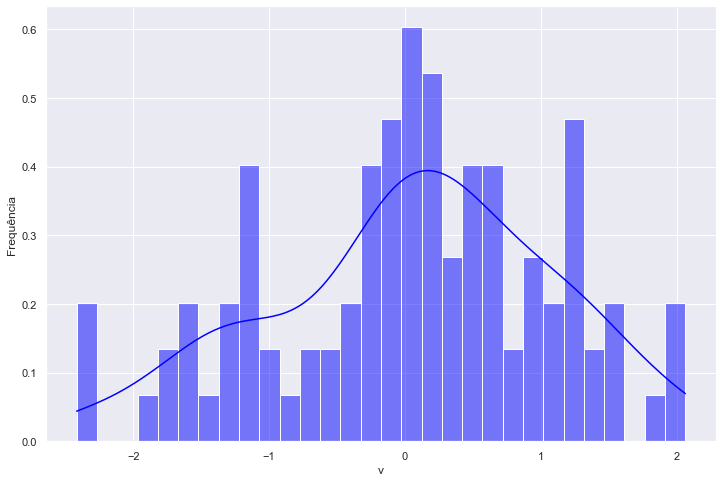

In [5]:
# plot da distribuição de v
sns.set(rc={'figure.figsize':(12,8)});
ax = sns.histplot(v,
                  bins=30,
                  kde=True,
                  color='blue',
                  stat = "density");
ax.set(xlabel='v', ylabel='Frequência');

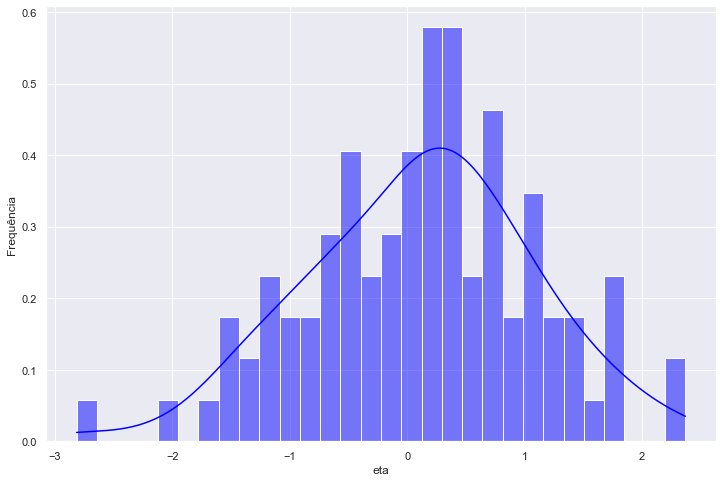

In [6]:
# plot da distribuição de eta
sns.set(rc={'figure.figsize':(12,8)});
ax = sns.histplot(eta,
                  bins=30,
                  kde=True,
                  color='blue',
                  stat = "density");
ax.set(xlabel='eta', ylabel='Frequência');

In [7]:
# matriz de covariância entre v e eta
np.cov(v, eta)

array([[1.06880415, 0.11818781],
       [0.11818781, 0.92601162]])

onde os valores assintóticos devem ser

$$
\mathbb{V}[v] = 1 \\
\mathbb{V}[\eta] = 1 \\
\mathbb{C}[v, \eta] = \mathbb{C}[\eta, v] = 0 \\
$$

In [8]:
# criando u genérico
u = np.zeros(n)

$$
u_i = \lambda v_i + \eta_i
$$

In [9]:
# definindo u
for i in range(n):
    u[i] = lambdaa*v[i] + eta[i]

In [10]:
# matriz de covariância entre u e v
np.cov(u, v)

array([[1.31140046, 0.65258988],
       [0.65258988, 1.06880415]])

onde a teoria nos diz que 

$$
\mathbb{V}[u] = \frac{5}{4}\\
$$

e

$$
\begin{aligned}
\mathbb{C}[u, v] &= \mathbb{C}[\lambda v + \eta, v]  \\
&= \lambda\mathbb{C}[v, v] + \mathbb{C}[\eta, v] \\
&= \lambda \mathbb{V}[v] + \mathbb{C}[\eta, v] \\
&= 0.5\cdot 1 + 0 = 0.5
\end{aligned}
$$

In [11]:
# gerandos x1
x1 = np.ones(n)

In [12]:
# gerando x2, x3
mean = [0, 0]
cov = [[1, 0.5], [0.5, 1]]

x2, x3 = np.random.multivariate_normal(mean, cov, n).T

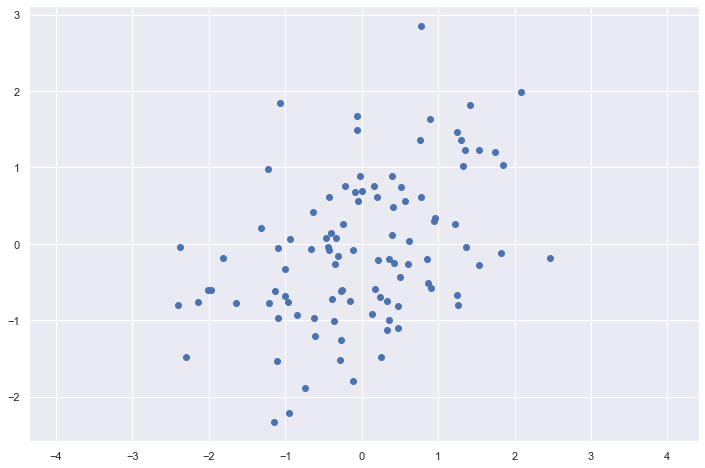

In [13]:
# densidade conjunta de x2 e x3
plt.plot(x2, x3, 'o')
plt.axis('equal')
plt.show()

In [14]:
np.cov(x2,x3)

array([[1.08341197, 0.43012231],
       [0.43012231, 0.95269634]])

$$
y_{2 i}=\pi_1 x_{1 i}+\pi_2 x_{2 i}+\pi_3 x_{3 i}+v_i
$$

In [15]:
# definindo y2
y2 = np.zeros(n)

for i in range(n):
    y2[i] = pi_1*x1[i] + pi_2*x2[i] + pi_3*x3[i] + v[i]

$$
y_{1 i}^*=\gamma y_{2 i}+\beta_1 x_{1 i}+\beta_2 x_{2 i}+u_i
$$

In [16]:
# definindo y1*
y1_star = np.zeros(n)

for i in range(n):
    y1_star[i] = gamma*y2[i] + beta_1*x1[i] + beta_2*x2[i] + u[i]

$$
y_{1 i}=\mathbb{I}\left(y_{1 i}^*>0\right)
$$

In [17]:
# definindo y1
y1 = np.zeros(n)

for i in range(n):
    if y1_star[i] > 0:
        y1[i] = 1
    else:
        y1[i] = 0

### $(b)$ (1.4) Considerando o processo de geração de dados descrito acima, simule uma amostra de tamanho $n$ e implemente a estimação solicitada no item (a). Obtenha as estimativas dos parâmetros $\left(\gamma, \beta_1, \beta_2, \pi_1, \pi_2, \pi_3\right)$ e intervalos de confiança de $95 \%$ via bootstrap.

Agora precisamos montar a log-likelihood, que é

$$
\begin{aligned}
\ln(\mathcal{L}) &= \sum_{i=1}^n \ln\left[f(y_{1 i}, y_{2 i}| x_i)\right]\\
&= \sum_{i=1}^n y_{1 i}\ln\left[\Phi(w)\right] + (1-y_{1 i})\ln\left[1-\Phi(w)\right] - \frac{1}{2}\ln\left[\sigma_v^2\right] -\left(\frac{\left(y_{2 i} - \left(\pi_1 x_{1 i}+\pi_2 x_{2 i}+\pi_3 x_{3 i}\right)\right)^2}{2\sigma_v^2}\right)
\end{aligned}
$$

onde $w = \frac{(\gamma+\lambda) y_{2 i}+(\beta_1-\lambda\pi_1) x_{1 i}+(\beta_2-\lambda\pi_2) x_{2 i}-\lambda\pi_3 x_{3 i}}{\sqrt{\sigma_u^2 - \lambda^2\sigma_v^2}}$

Para diminuir o tempo computacional, vamos vetorizar as variáveis que temos, i.e. $x_1$, $x_2$, $x_3$, $y_1$ e $y_3$.

In [18]:
# IV Instrumental Variable
def mle_IVprobit(parametros, x1, x2, x3, y1, y2):
       # parametros (são os outputs futuros do problema de otimização)
       gamma, beta_1, beta_2, pi_1, pi_2, pi_3, lambdaa, sigma2_u, sigma2_v = parametros 
       """
       primeiro criamos w, depois criamos a log-likelihood
       a log-likelihood é um vetor, onde cada entrada é o valor para um i
       """
       w = np.zeros(100)
       w = ( ( gamma + lambdaa ) * y2 + ( beta_1 - lambdaa*pi_1 ) * x1 + \
          ( beta_2 - lambdaa*pi_2 ) * x2 - lambdaa * pi_3 * x3 ) / ( ( sigma2_u - ( lambdaa**(2) ) * sigma2_v )**(1/2) )

       
       ln_pdf = y1 * np.log( norm.cdf( w ) ) + ( 1 - y1 ) * np.log( 1 - norm.cdf( w ) ) \
          - (1/2) * np.log( sigma2_v ) - ( ( y2 - ( pi_1 * x1 + pi_2 * x2 + pi_3 * x3 ) )**2 / ( 2 * sigma2_v ) ) 
       
       LL = (ln_pdf).sum()
       """
       a log-likelihood é na verdade, a soma de todas entradas
       calculamos o negativo dela porque em python só temos a função minimizadora
       """
       neg_LL = -LL
       return neg_LL

In [19]:
# função de otimização
def estimadores(x1, x2, x3, y1, y2, chute_inicial):
    """
    Calcula os valores que minimiza a função de verossimilhançaa dada a amostra
    :param x: valores de x da amostra de tamanho n
    :param y: valores de y da amostra de tamanho n
    :param chute_inicial: chute inicial na forma (gamma, beta_1, beta_2, pi_1, pi_2, pi_3, lambdaa, sigma2_u, sigma2_v)
    :return: tupla com os valores ótimos (gamma, beta_1, beta_2, pi_1, pi_2, pi_3, lambdaa, sigma2_u, sigma2_v)
    """
    estimadores_mle_IVprobit = minimize(mle_IVprobit,
        x0=chute_inicial,
        args=(x1, x2, x3, y1, y2),
        bounds=((None, None), (None, None), (None, None), (None, None), (None, None), (None, None),  (None, None), (0.001, None), (0.001, None)),
        ).x
    return estimadores_mle_IVprobit

Esses são os resultados estimados respectivamente de, $\hat{\gamma}$, $\hat{\beta}_1$, $\hat{\beta}_2$, $\hat{\pi}_1$, $\hat{\pi}_2$, $\hat{\pi}_3$, $\hat{\lambda}$, $\hat{\sigma}_{u}^2$ e $\hat{\sigma}_{v}^2$.

In [20]:
chute = [0, 0, 0, 0, 0, 0, 0, 1, 1]
estimadores(x1, x2, x3, y1, y2, chute)

array([ 0.89761222,  0.23559134, -1.16003165,  0.04134322,  0.98970604,
        0.92240065,  0.17380656,  0.76372725,  1.05164601])

Os parâmetros verdadeiros são $\gamma=1$, $\beta_1=0$, $\beta_2=-1$, $\pi_1=0$, $\pi_2=1$, $\pi_3=1$, $\lambda=0.5$, $\sigma_{u}^2=1.25$ e $\sigma_{v}^2=1$.

Agora vamos fazer a estimação via Bootstrap, com 1000 reamostragens.

In [21]:
# gerando matrizes nulas para o procedimento de bootstrap
Bootstrap_x1 = np.zeros((1000, n))
Bootstrap_x2 = np.zeros((1000, n))
Bootstrap_x3 = np.zeros((1000, n))
Bootstrap_y1 = np.zeros((1000, n))
Bootstrap_y2 = np.zeros((1000, n))

estimadores_mle = np.zeros((1000, 9))

In [22]:
# Bootstrap
index = np.arange(0, n)       # criando um vetor de índices de 1 à 100


for i in range(1000):          
    random_index = np.random.choice(index, replace = True, size = n)      # escolhe um índice do vetor de índices aleatóriamente, com reposição, 100 vezes
    for j in range(n):
        Bootstrap_x1[i][j] = x1[random_index[j]]
        Bootstrap_x2[i][j] = x2[random_index[j]]
        Bootstrap_x3[i][j] = x3[random_index[j]]
        Bootstrap_y1[i][j] = y1[random_index[j]]
        Bootstrap_y2[i][j] = y2[random_index[j]]
    estimadores_mle[[i]] = estimadores( Bootstrap_x1[i],
                                        Bootstrap_x2[i],
                                        Bootstrap_x3[i],
                                        Bootstrap_y1[i],
                                        Bootstrap_y2[i],
                                        [0, 0, 0, 0, 0, 0, 0, 1, 1])

In [23]:
# função de intervalo de confiança
def intervalo_de_confianca(data):
    a = np.array(data)
    n = len(a)
    m, dp = np.mean(a), np.std(a)
    lower_cutoff = stats.t.ppf(0.025, n - 1, loc = m, scale = dp)
    upper_cutoff = stats.t.ppf(0.975, n - 1, loc = m, scale = dp)
    return lower_cutoff, upper_cutoff

In [24]:
# Tabela com os estimadores de mle de Bootstrap
estimadores_bootstrap_mle_probit = pd.DataFrame([ [np.mean(estimadores_mle[:,0]), np.median(estimadores_mle[:,0]), np.var(estimadores_mle[:,0]), np.max(estimadores_mle[:,0]), np.min(estimadores_mle[:,0]), intervalo_de_confianca(estimadores_mle[:,0])[0], intervalo_de_confianca(estimadores_mle[:,0])[1]],
                                                  [np.mean(estimadores_mle[:,1]), np.median(estimadores_mle[:,1]), np.var(estimadores_mle[:,1]), np.max(estimadores_mle[:,1]), np.min(estimadores_mle[:,1]), intervalo_de_confianca(estimadores_mle[:,1])[0], intervalo_de_confianca(estimadores_mle[:,1])[1]],
                                                  [np.mean(estimadores_mle[:,2]), np.median(estimadores_mle[:,2]), np.var(estimadores_mle[:,2]), np.max(estimadores_mle[:,2]), np.min(estimadores_mle[:,2]), intervalo_de_confianca(estimadores_mle[:,2])[0], intervalo_de_confianca(estimadores_mle[:,2])[1]],
                                                  [np.mean(estimadores_mle[:,3]), np.median(estimadores_mle[:,3]), np.var(estimadores_mle[:,3]), np.max(estimadores_mle[:,3]), np.min(estimadores_mle[:,3]), intervalo_de_confianca(estimadores_mle[:,3])[0], intervalo_de_confianca(estimadores_mle[:,3])[1]],
                                                  [np.mean(estimadores_mle[:,4]), np.median(estimadores_mle[:,4]), np.var(estimadores_mle[:,4]), np.max(estimadores_mle[:,4]), np.min(estimadores_mle[:,4]), intervalo_de_confianca(estimadores_mle[:,4])[0], intervalo_de_confianca(estimadores_mle[:,4])[1]],
                                                  [np.mean(estimadores_mle[:,5]), np.median(estimadores_mle[:,5]), np.var(estimadores_mle[:,5]), np.max(estimadores_mle[:,5]), np.min(estimadores_mle[:,5]), intervalo_de_confianca(estimadores_mle[:,5])[0], intervalo_de_confianca(estimadores_mle[:,5])[1]]],
                                                columns=['Média', 'Mediana', 'Variância', 'Máximo', 'Mínimo', 'IC Inferior', 'IC Superior'], 
                                                index=['γ', 'β_1', 'β_2', 'π_1', 'π_2', 'π_3'])
estimadores_bootstrap_mle_probit

,Média,Mediana,Variância,Máximo,Mínimo,IC Inferior,IC Superior
γ,0.799227,0.865645,0.095771,1.463229,0.128823,0.191942,1.406511
β_1,0.215816,0.212107,0.018471,0.651249,-0.201340,-0.050882,0.482514
β_2,-1.010993,-1.064384,0.213154,-0.078197,-2.032058,-1.916979,-0.105007
π_1,0.029391,0.029571,0.011088,0.418041,-0.284065,-0.177241,0.236023
π_2,0.983178,0.979501,0.013181,1.436977,0.564773,0.757885,1.208471
π_3,0.901971,0.898868,0.018226,1.321223,0.496996,0.637049,1.166893


Os parâmetros verdadeiros são $\gamma=1$, $\beta_1=0$, $\beta_2=-1$, $\pi_1=0$, $\pi_2=1$ e $\pi_3=1$

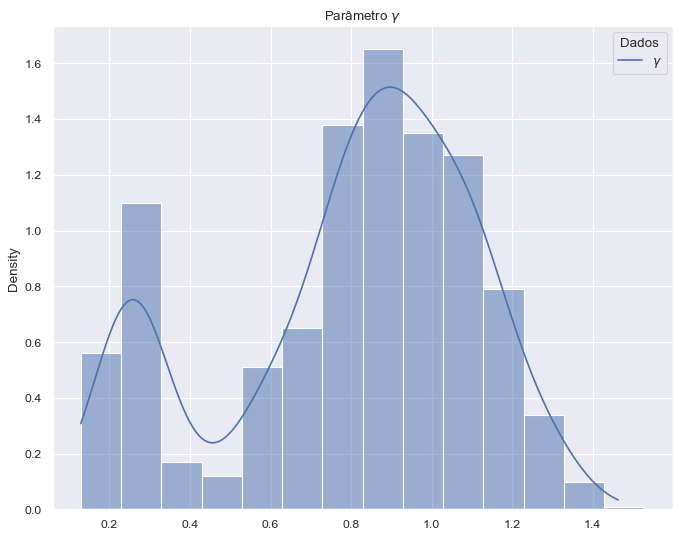

In [25]:
# Plots
plt.figure(figsize=(10, 8), dpi=80)
sns.histplot((estimadores_mle[:,0]), kde=True, binwidth=0.1, stat='density').set_title('Parâmetro $γ$')
plt.legend(title='Dados', loc='upper right', labels=['$γ$'])

$\gamma=1$

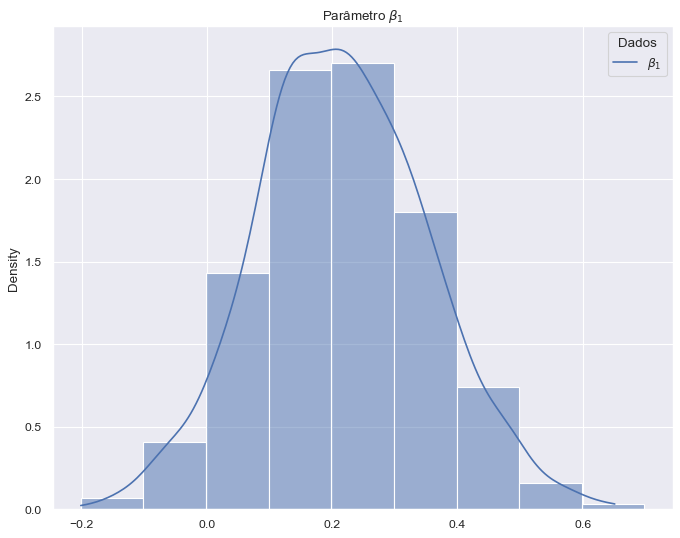

In [26]:
# Plots
plt.figure(figsize=(10, 8), dpi=80)
sns.histplot((estimadores_mle[:,1]), kde=True, binwidth=0.1, stat='density').set_title('Parâmetro $β_1$')
plt.legend(title='Dados', loc='upper right', labels=['$β_1$'])

$\beta_1=0$

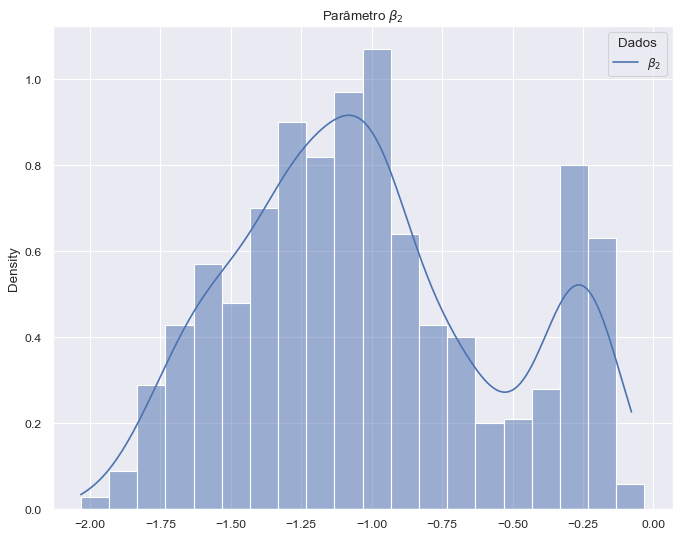

In [27]:
# Plots
plt.figure(figsize=(10, 8), dpi=80)
sns.histplot((estimadores_mle[:,2]), kde=True, binwidth=0.1, stat='density').set_title('Parâmetro $β_2$')
plt.legend(title='Dados', loc='upper right', labels=['$β_2$'])

$\beta_2=-1$

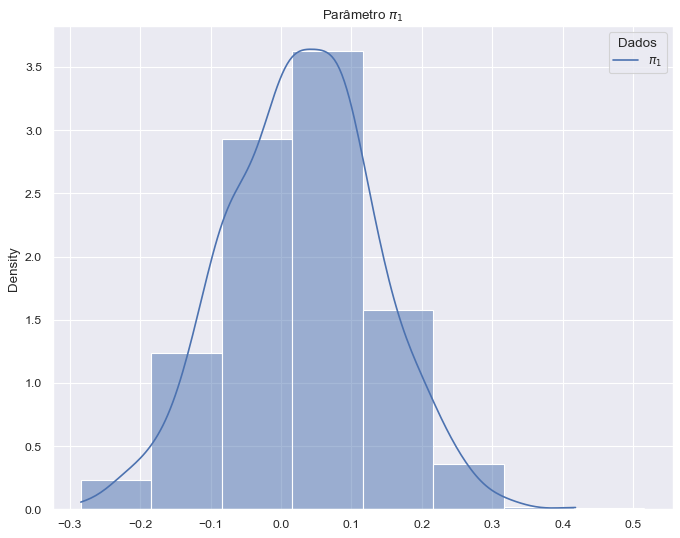

In [28]:
# Plots
plt.figure(figsize=(10, 8), dpi=80)
sns.histplot((estimadores_mle[:,3]), kde=True, binwidth=0.1, stat='density').set_title('Parâmetro $π_1$')
plt.legend(title='Dados', loc='upper right', labels=['$π_1$'])

$\pi_1=0$

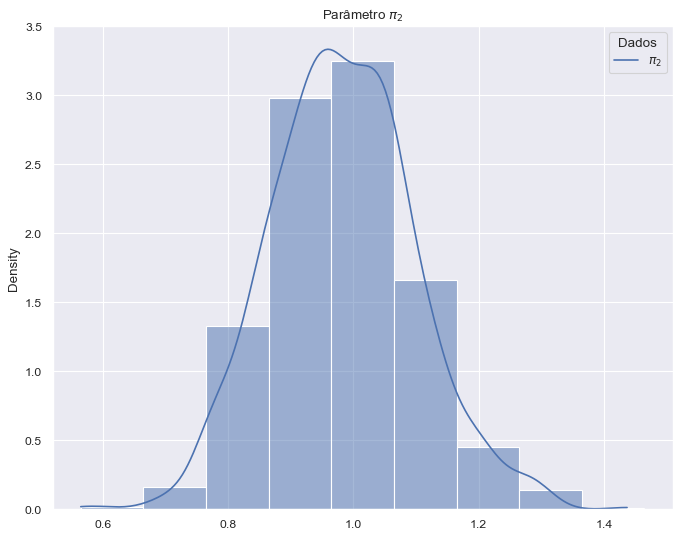

In [29]:
# Plots
plt.figure(figsize=(10, 8), dpi=80)
sns.histplot((estimadores_mle[:,4]), kde=True, binwidth=0.1, stat='density').set_title('Parâmetro $π_2$')
plt.legend(title='Dados', loc='upper right', labels=['$π_2$'])

$\pi_2=1$

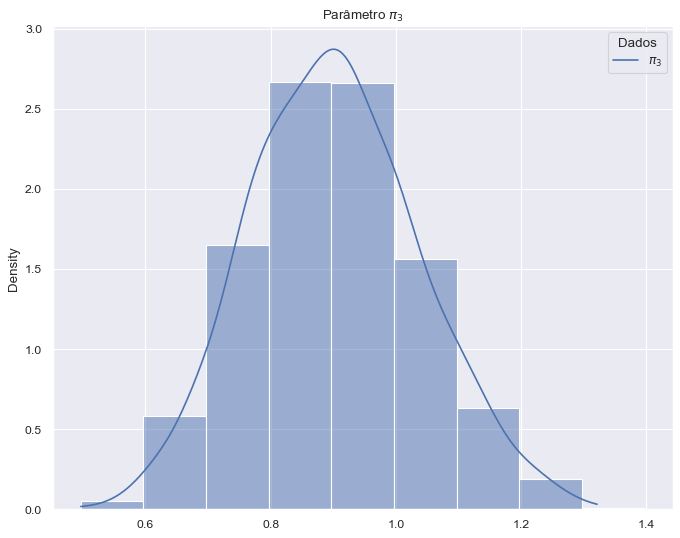

In [30]:
# Plots
plt.figure(figsize=(10, 8), dpi=80)
sns.histplot((estimadores_mle[:,5]), kde=True, binwidth=0.1, stat='density').set_title('Parâmetro $π_3$')
plt.legend(title='Dados', loc='upper right', labels=['$π_3$'])

$\pi_3=1$

### $(c)$ (1.0) Proponha um método de estimação alternativo em dois passos, que permita testar a hipótese de endogeneidade no modelo. Descreva o método de estimação e, se houver, a função de verossimilhança.

Rivers and Vuong (JoE 1988) oferecem um método alternativo ao anterior que consiste em dois passos:

- OLS de $y_2$ em $x1$, $x_2$ e $x_3$, e extrair os resíduos $\hat{v}$
- Probit de $y_1$ em $y_2$, $x_1$, $x_2$ e $\hat{v}$

$H_0$ : $\xi = 0$ é um teste simples para endogeneidade, onde $\xi$ é o coeficiente de $v$ no segundo estágio.

Para escrever a verossimilhança temos que partir do seguinte

$$
y_{1 i}^*=\alpha_1 y_{2 i}+\alpha_2 x_{1 i}+\alpha_3 x_{2 i}+ \xi\hat{v}_i + \epsilon
$$

onde $\epsilon \sim \mathcal{N}(0,\sigma_{\epsilon}^2)$ e

$$
y_{1 i}=\mathbb{I}\left(y_{1 i}^*>0\right)
$$

Da mesma forma que foi feito em (a), criamos a log-likelihood.

$$
\begin{aligned}
\mathbb{P}(y_{1 i} = 1| y_{2 i}, x_i, \hat{v}_i) &= \mathbb{P}(y_{1 i}^* > 0| y_{2 i}, x_i, \hat{v}_i)\\

&= \mathbb{P}(\alpha_1 y_{2 i} + \alpha_2 x_{1 i} + \alpha_3 x_{2 i} + \xi \hat{v}_i + \epsilon > 0 |y_{2 i}, x_i, \hat{v}_i) \\

&= \mathbb{P}( \epsilon > - \left[\alpha_1 y_{2 i} + \alpha_2 x_{1 i} + \alpha_3 x_{2 i} + \xi \hat{v}_i\right]) \\

&= \mathbb{P}( \epsilon < \alpha_1 y_{2 i} + \alpha_2 x_{1 i} + \alpha_3 x_{2 i} + \xi \hat{v}_i) \\

&= \mathbb{P}\left( \frac{\epsilon}{\sigma_{\epsilon}} < \frac{\alpha_1 y_{2 i} + \alpha_2 x_{1 i} + \alpha_3 x_{2 i} + \xi \hat{v}_i}{\sigma_{\epsilon}} \right) \\

&=\Phi\left(\frac{\alpha_1 y_{2 i} + \alpha_2 x_{1 i} + \alpha_3 x_{2 i} + \xi \hat{v}_i}{\sigma_{\epsilon}} \right) \\
\end{aligned}
$$



Defina 
$$
\Phi(z) =\Phi\left(\frac{\alpha_1 y_{2 i} + \alpha_2 x_{1 i} + \alpha_3 x_{2 i} + \xi \hat{v}_i}{\sigma_{\epsilon}} \right)
$$

Como $y_{1 i} \in \{0, 1\}$, então

$$
\begin{aligned}
f(y_{1 i}|y_{2 i}, x_i, \hat{v}_i) &= \mathbb{P}(y_{1 i} = 1| y_{2 i}, x_i, \hat{v}_i)^{y_{1 i}}\left[1 - \mathbb{P}(y_{1 i} = 1| y_{2 i}, x_i, \hat{v}_i)\right]^{(1-y_{1 i})} \\
&= \left[\Phi(z)\right]^{y_{1 i}}\left[1 - \Phi(z)\right]^{(1 - y_{1 i})}
\end{aligned}
$$

Portanto a Likelihood é 

$$
\mathcal{L} = \prod_{i=1}^n f(y_{1 i}, y_{2 i}| x_i)
$$

e a Log-Likelihood é

$$
\begin{aligned}
\ln(\mathcal{L}) &= \sum_{i=1}^n \ln\left[f(y_{1 i}, y_{2 i}| x_i)\right] \\
&= \sum_{i=1}^n y_{1 i} \ln\left[\Phi(z)\right] + (1 - y_{1 i}) \ln\left[1 - \Phi(z)\right] \\
&= \sum_{i=1}^n y_{1 i} \ln\left[\Phi\left(\frac{\alpha_1 y_{2 i} + \alpha_2 x_{1 i} + \alpha_3 x_{2 i} + \xi \hat{v}_i}{\sigma_{\epsilon}} \right)\right] + (1 - y_{1 i}) \ln\left[1 - \Phi\left(\frac{\alpha_1 y_{2 i} + \alpha_2 x_{1 i} + \alpha_3 x_{2 i} + \xi \hat{v}_i}{\sigma_{\epsilon}} \right)\right]
\end{aligned}
$$

### $(d)$ (1.4) Implemente a estimação do item $(c)$ usando o mesmo processo de geração do item $(b)$. Obtenha as estimativas dos parâmetros $\left(\gamma, \beta_1, \beta_2, \pi_1, \pi_2, \pi_3\right)$ e intervalos de confiança de $95 \%$ via bootstrap.

O primeiro passo consiste em obter os resíduos estimados por OLS da seguinte regressão
$$
y_{2 i}=\pi_1 x_{1 i}+\pi_2 x_{2 i}+\pi_3 x_{3 i}+v_i
$$

In [31]:
df = pd.DataFrame({'x1':x1, 'x2':x2, 'x3':x3, 'y1':y1, 'y2':y2})

In [32]:
ols = pd.DataFrame()

ols['y'] = df['y2']
ols['x1'] = df['x1']
ols['x2'] = df['x2']
ols['x3'] = df['x3']

result = sm.ols(formula="y ~ x1 + x2 + x3", data=ols).fit()

In [33]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     121.3
Date:                Sat, 17 Dec 2022   Prob (F-statistic):           4.02e-27
Time:                        19:26:01   Log-Likelihood:                -144.41
No. Observations:                 100   AIC:                             294.8
Df Residuals:                      97   BIC:                             302.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0207      0.052      0.396      0.6

In [34]:
v_chapeu = np.array(result.resid)

$$
\begin{aligned}
\ln(\mathcal{L}) = \sum_{i=1}^n y_{1 i} \ln\left[\Phi\left(\frac{\alpha_1 y_{2 i} + \alpha_2 x_{1 i} + \alpha_3 x_{2 i} + \xi \hat{v}_i}{\sigma_{\epsilon}^2} \right)\right] + (1 - y_{1 i}) \ln\left[1 - \Phi\left(\frac{\alpha_1 y_{2 i} + \alpha_2 x_{1 i} + \alpha_3 x_{2 i} + \xi \hat{v}_i}{\sigma_{\epsilon}^2} \right)\right]
\end{aligned}
$$

In [35]:
# 2SCLM Two Stage Conditional Maximum Likelihood
def mle_2SCML(parametros, x1, x2, y1, y2, v_chapeu):
   # parametros (são os outputs futuros do problema de otimização)
   alpha_1, alpha_2, alpha_3, xi, sigma2_e = parametros 
   """
   primeiro criamos z, depois criamos a log-likelihood
   a log-likelihood é um vetor, onde cada entrada é o valor para um i
   """
   z = np.zeros(100)
   z = ( alpha_1 * y2 + alpha_2 * x1 + alpha_3 * x2 + xi * v_chapeu ) / ( sigma2_e**(1/2) ) 
   

   ln_pdf = y1 * np.log( norm.cdf( z ) ) + ( 1 - y1 ) * np.log( 1 - norm.cdf( z ) )
   
   LL = (ln_pdf).sum()
   """
   a log-likelihood é na verdade, a soma de todas entradas
   calculamos o negativo dela porque em python só temos a função minimizadora
   """
   neg_LL = -LL
   return neg_LL

In [36]:
# função de otimização
def estimadores_(x1, x2, y1, y2, v_chapeu, chute_inicial):
    """
    Calcula os valores que minimiza a função de verossimilhançaa dada a amostra
    :param x: valores de x da amostra de tamanho n
    :param y: valores de y da amostra de tamanho n
    :param v_chapeu: valores de v_chapeu da amostra de tamanho n
    :param chute_inicial: chute inicial na forma (alpha_1, alpha_2, alpha_3, xi, sigma2_e)
    :return: tupla com os valores ótimos (alpha_1, alpha_2, alpha_3, xi, sigma2_e)
    """
    estimadores_2SCML = minimize(mle_2SCML,
        x0=chute_inicial,
        args=(x1, x2, y1, y2, v_chapeu),
        bounds=((None, None), (None, None), (None, None), (None, None), (0.0001, None)),
        method = 'L-BFGS-B'
        ).x
    return estimadores_2SCML

Esses são os resultados estimados respectivamente de, $\hat{\alpha}_1$, $\hat{\alpha}_2$, $\hat{\alpha}_2$, $\hat{\alpha}_3$, $\hat{\xi}$ e $\hat{\sigma}_{\epsilon}^2$.

In [37]:
chute = [0, 0, 0, 0, 1]
estimadores_(x1, x2, y1, y2, v_chapeu, chute)

array([ 1.0666257 ,  0.27995267, -1.37845806,  0.2065249 ,  1.03354243])

Como o modelo verdadeiro é $y_{1 i}^*=\gamma y_{2 i}+\beta_1 x_{1 i}+\beta_2 x_{2 i}+u_i$ onde $u_i = \lambda v_i + \eta_i$

Então os parâmetros verdadeiros são
- $\alpha_1=\gamma=1$
- $\alpha_2=\beta_1=0$
- $\alpha_3=\beta_2=-1$
- $\xi=\lambda=0.5$
- $\sigma_{\epsilon}^2 = \sigma_{\eta}^2=1$

Agora vamos fazer a estimação via Bootstrap, com 1000 reamostragens.

In [38]:
# gerando matrizes nulas para o procedimento de bootstrap
Bootstrap_x1 = np.zeros((1000, n))
Bootstrap_x2 = np.zeros((1000, n))
Bootstrap_y1 = np.zeros((1000, n))
Bootstrap_y2 = np.zeros((1000, n))
Bootstrap_v = np.zeros((1000, n))

estimadores_mle_ = np.zeros((1000, 5))

In [39]:
# Bootstrap
index = np.arange(0, n)       # criando um vetor de índices de 1 à 100


for i in range(1000):          
    random_index = np.random.choice(index, replace = True, size = n)      # escolhe um índice do vetor de índices aleatóriamente, com reposição, 100 vezes
    for j in range(n):
        Bootstrap_x1[i][j] = x1[random_index[j]]
        Bootstrap_x2[i][j] = x2[random_index[j]]
        Bootstrap_y1[i][j] = y1[random_index[j]]
        Bootstrap_y2[i][j] = y2[random_index[j]]
        Bootstrap_v[i][j] = v_chapeu[random_index[j]]
    estimadores_mle_[[i]] = estimadores_(   Bootstrap_x1[i],
                                                        Bootstrap_x2[i],
                                                        Bootstrap_y1[i],
                                                        Bootstrap_y2[i],
                                                        Bootstrap_v[i],
                                                        [0, 0, 0, 0, 1])

In [40]:
# Tabela com os estimadores de mle de Bootstrap
estimadores_bootstrap_mle_probit = pd.DataFrame([ [np.mean(estimadores_mle_[:,0]), np.median(estimadores_mle_[:,0]), np.var(estimadores_mle_[:,0]), np.max(estimadores_mle_[:,0]), np.min(estimadores_mle_[:,0]), intervalo_de_confianca(estimadores_mle_[:,0])[0], intervalo_de_confianca(estimadores_mle_[:,0])[1]],
                                                  [np.mean(estimadores_mle_[:,1]), np.median(estimadores_mle_[:,1]), np.var(estimadores_mle_[:,1]), np.max(estimadores_mle_[:,1]), np.min(estimadores_mle_[:,1]), intervalo_de_confianca(estimadores_mle_[:,1])[0], intervalo_de_confianca(estimadores_mle_[:,1])[1]],
                                                  [np.mean(estimadores_mle_[:,2]), np.median(estimadores_mle_[:,2]), np.var(estimadores_mle_[:,2]), np.max(estimadores_mle_[:,2]), np.min(estimadores_mle_[:,2]), intervalo_de_confianca(estimadores_mle_[:,2])[0], intervalo_de_confianca(estimadores_mle_[:,2])[1]],
                                                  [np.mean(estimadores_mle_[:,3]), np.median(estimadores_mle_[:,3]), np.var(estimadores_mle_[:,3]), np.max(estimadores_mle_[:,3]), np.min(estimadores_mle_[:,3]), intervalo_de_confianca(estimadores_mle_[:,3])[0], intervalo_de_confianca(estimadores_mle_[:,3])[1]],
                                                  [np.mean(estimadores_mle_[:,4]), np.median(estimadores_mle_[:,4]), np.var(estimadores_mle_[:,4]), np.max(estimadores_mle_[:,4]), np.min(estimadores_mle_[:,4]), intervalo_de_confianca(estimadores_mle_[:,4])[0], intervalo_de_confianca(estimadores_mle_[:,4])[1]]],
                                                columns=['Média', 'Mediana', 'Variância', 'Máximo', 'Mínimo', 'IC Inferior', 'IC Superior'], 
                                                index=['α_1', 'α_2', 'α_3', 'ξ', 'σ2_ε'])
estimadores_bootstrap_mle_probit

,Média,Mediana,Variância,Máximo,Mínimo,IC Inferior,IC Superior
α_1,1.106405,1.084940,0.065001,2.049833,0.447055,0.606102,1.606708
α_2,0.288975,0.288789,0.032382,0.900551,-0.325215,-0.064149,0.642099
α_3,-1.441420,-1.400159,0.205919,-0.247892,-3.017180,-2.331897,-0.550942
ξ,0.215362,0.209705,0.061845,1.396973,-0.560496,-0.272647,0.703372
σ2_ε,0.956560,0.984923,0.010460,1.102282,0.507750,0.755865,1.157255


Os parâmetros verdadeiros são
- $\alpha_1=\gamma=1$
- $\alpha_2=\beta_1=0$
- $\alpha_3=\beta_2=-1$
- $\xi=\lambda=0.5$
- $\sigma_{\epsilon}^2 = \sigma_{\eta}^2=1$

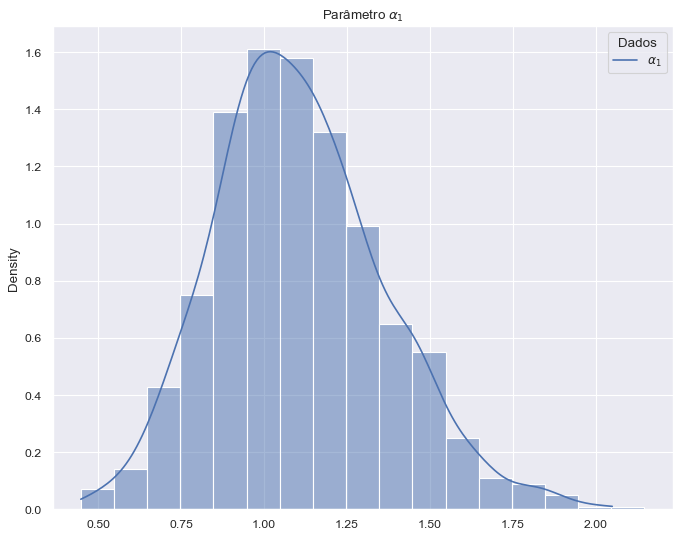

In [41]:
# Plots
plt.figure(figsize=(10, 8), dpi=80)
sns.histplot((estimadores_mle_[:,0]), kde=True, binwidth=0.1, stat='density').set_title('Parâmetro $α_1$')
plt.legend(title='Dados', loc='upper right', labels=['$α_1$'])

$\alpha_1=\gamma=1$

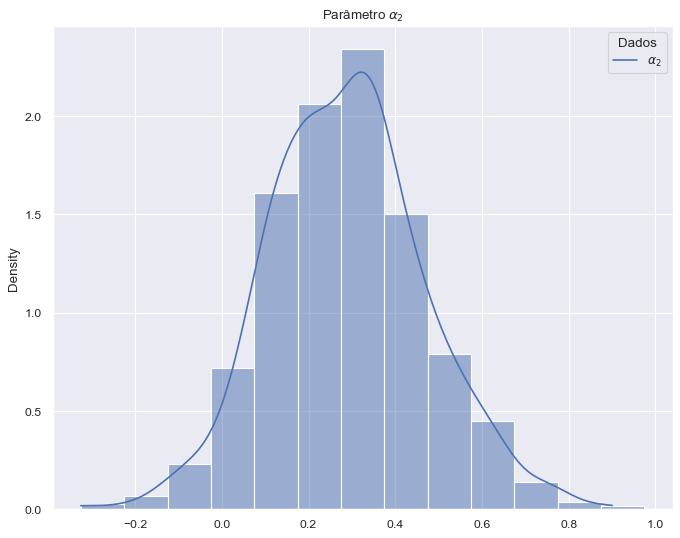

In [42]:
# Plots
plt.figure(figsize=(10, 8), dpi=80)
sns.histplot((estimadores_mle_[:,1]), kde=True, binwidth=0.1, stat='density').set_title('Parâmetro $α_2$')
plt.legend(title='Dados', loc='upper right', labels=['$α_2$'])

$\alpha_2=\beta_1=0$

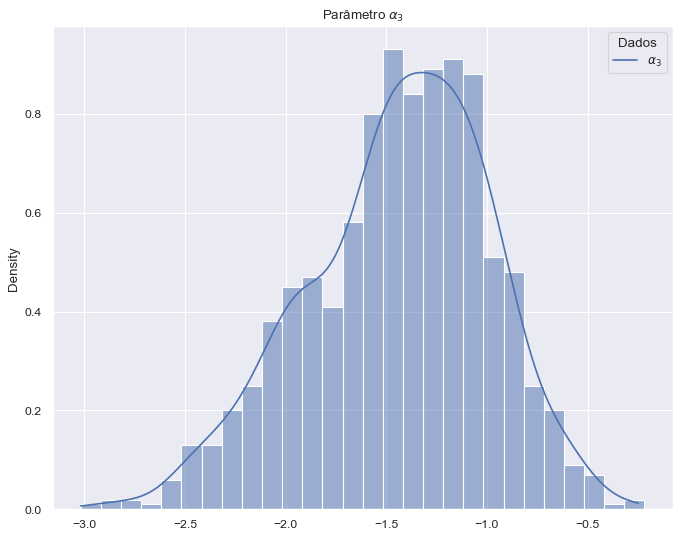

In [43]:
# Plots
plt.figure(figsize=(10, 8), dpi=80)
sns.histplot((estimadores_mle_[:,2]), kde=True, binwidth=0.1, stat='density').set_title('Parâmetro $α_3$')
plt.legend(title='Dados', loc='upper right', labels=['$α_3$'])

$\alpha_3=\beta_2=-1$

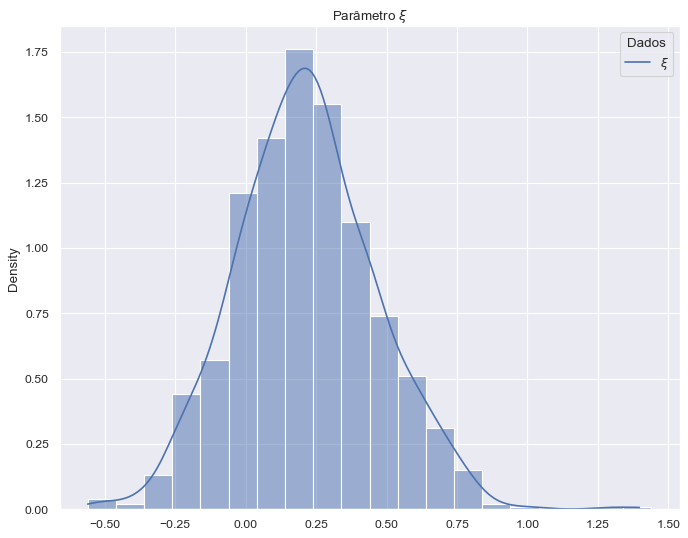

In [44]:
# Plots
plt.figure(figsize=(10, 8), dpi=80)
sns.histplot((estimadores_mle_[:,3]), kde=True, binwidth=0.1, stat='density').set_title('Parâmetro $ξ$')
plt.legend(title='Dados', loc='upper right', labels=['$ξ$'])

$\xi=\lambda=0.5$

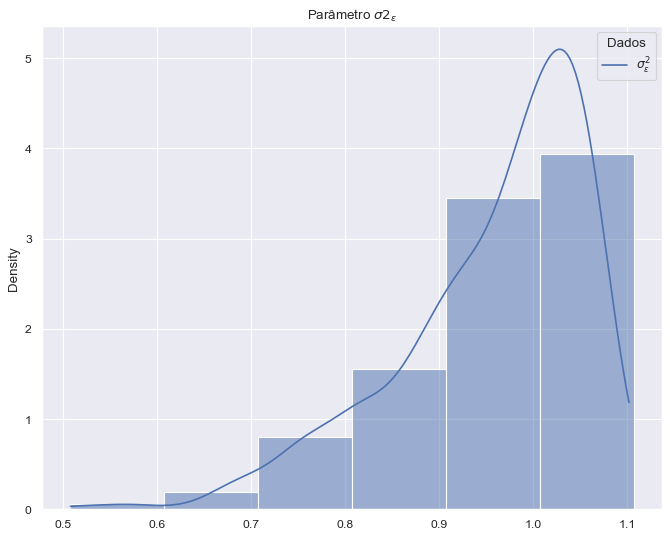

In [45]:
# Plots
plt.figure(figsize=(10, 8), dpi=80)
sns.histplot((estimadores_mle_[:,4]), kde=True, binwidth=0.1, stat='density').set_title('Parâmetro $σ2_ε$')
plt.legend(title='Dados', loc='upper right', labels=['$σ^2_ε$'])

$\sigma_{\epsilon}^2 = \sigma_{\eta}^2=1$

### $(e)$ (0.2) Compare as estimativas obtidas nos itens $(b)$ e $(d)$. Comente sobre os métodos de estimação, suas vantagens e desvantagens.

Seguindo o artigo de Rivers (1988), o autor mostra que o estimador proposto em $(c)$, Two Stage Conditional Maximum Likelihood (2SCML), tem performance favorável em relação aos seus competidores, incluindo o estimador Intrumental Variable Probit (IVP). Em seu paper, o autor mostra que o viés é menor para quase todos os casos do estimador 2SCML em relação ao IVP. Também é mostrado que o mesmo tem propriedades atrativas tanto para pequenas quanto para grandes amostras. Além disso, a eficiência de 2SCML permite construir vários testes de exogeneidade simples para modelos Probit. 

Os resultados obtidos em $(b)$ e $(d)$ também caminham nessa direção. O método de Bootstrap sobre o IVP encontrou estimativas na média, piores do que quando se usa 2SCML. Não somente, foram encotradas distribuições bem mais complexas em IVP do que 2SCML, onde alguns parâmetros (dependendo da amostra aleatória gerada) obtém distribuições até bimodais.